## About
This app is intended to display solar flare data.
the data you can currently see is class, size, distribution, activity, evolution, previous 24 hours, historical compexity, became complex, area, area of largest spot, number of C-class, M-class, and X-class flares.
Within the solar flare information tab we have the direct list of data availible for the flare.",
The app also contains pie charts of each value, with a data statistics page aswell."

## GUI

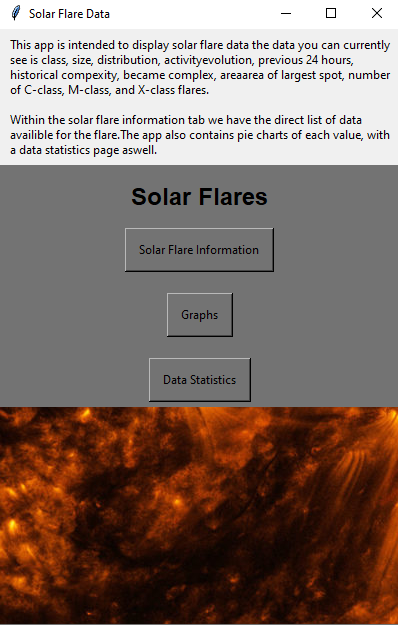

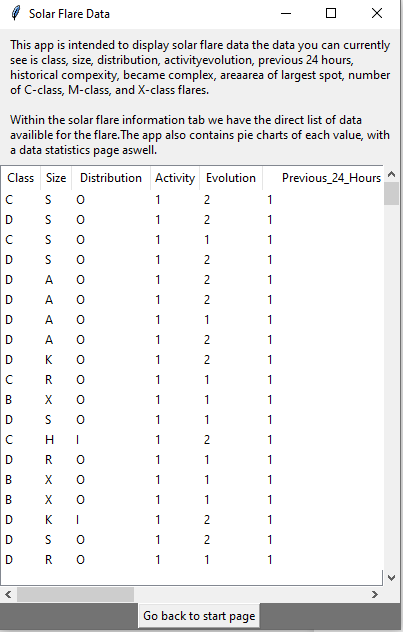

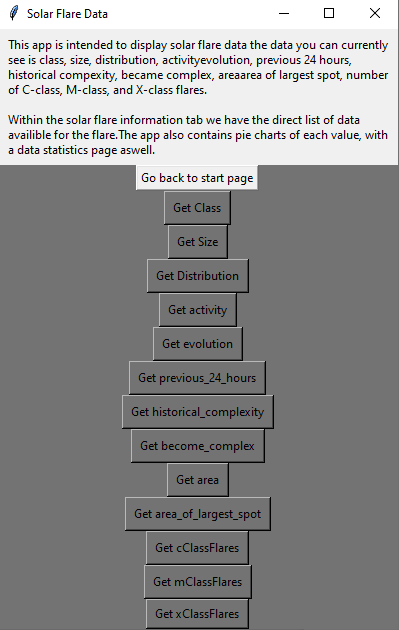

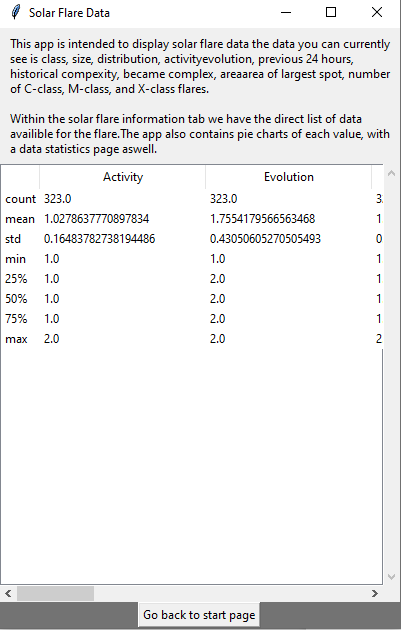

## Predictor

In [7]:
import pandas as pd
from treeviz import tree_print
from sklearn import tree
from sklearn.metrics import accuracy_score
# sklearn provides manipulation of training sets...here we do train/test split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from bootstrap import bootstrap

In [11]:
df = pd.read_csv("flare2.csv")

df = df.replace("A", 0)
df = df.replace("B", 1)
df = df.replace("C", 2)
df = df.replace("D", 3)
df = df.replace("E", 4)
df = df.replace("F", 5)
df = df.replace("H", 6)

df = df.replace("R", 1)
df = df.replace("S", 2)
df = df.replace("H", 3)
df = df.replace("K", 4)


df = df.replace("X", 1)
df = df.replace("O", 2)
df = df.replace("I", 3)
df = df.replace("C", 4)

X = df.drop(['cClassFlares'], axis=1)
y = df['cClassFlares']

In [12]:
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
param_grid = {'max_depth': list(range(1,21)), 'criterion': ['entropy','gini'] }
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
model.fit(X_train, y_train)
print("Grid Search: best parameters: {}".format(grid.best_params_))
best_model = grid.best_estimator_
predict_y = best_model.predict(X)

tree_print(model, df)

print("Accuracy: {}".format(accuracy_score(y, predict_y)))

labels = [1, 0]
cm = confusion_matrix(y, predict_y, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

print("Confidence interval best decision tree: {}".format(bootstrap(best_model,df,'cClassFlares')))

C:\Users\samc3\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Grid Search: best parameters: {'criterion': 'entropy', 'max_depth': 1}
if cClassFlares =< 0.5: 
  |then 0
  |else if class =< 3.5: 
  |  |then 2
  |  |else 1
<---->
Tree Depth:  2
Accuracy: 0.99906191369606
Confusion Matrix:
   1     0
1  4     0
0  0  1061
Confidence interval best decision tree: (0.9906542056074766, 1.0)
